In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np     

In [31]:
data_path = '../data/admission_data_standardized.csv'
df = pd.read_csv(data_path)
df.rename(columns={'chance_of_admit': 'Chance_of_Admit'}, inplace=True)
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Chance_of_Admit
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,0.92
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.76
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,0.72
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.80
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,0.65


In [32]:
x = df.drop(columns=['Chance_of_Admit'])
y = df['Chance_of_Admit']

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [35]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [36]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

In [37]:
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

mse_train_pca = mean_squared_error(y_train_pca, y_train_pred_pca)
mse_test_pca = mean_squared_error(y_test_pca, y_test_pred_pca)

print(f'Training Mean Squared Error after PCA: {mse_train_pca:.5f}')
print(f'Test Mean Squared Error after PCA: {mse_test_pca:.5f}')

Training Mean Squared Error after PCA: 0.00448
Test Mean Squared Error after PCA: 0.00551


In [38]:
pred_pca_df = pd.DataFrame({'Actual': y_test_pca.values, 'Predicted': y_test_pred_pca})
output_pca_csv = '../results/regression_predictions_pca.csv'
pred_pca_df.to_csv(output_pca_csv, index=False)
print(f'Saved PCA predictions to {output_pca_csv}')

Saved PCA predictions to ../results/regression_predictions_pca.csv


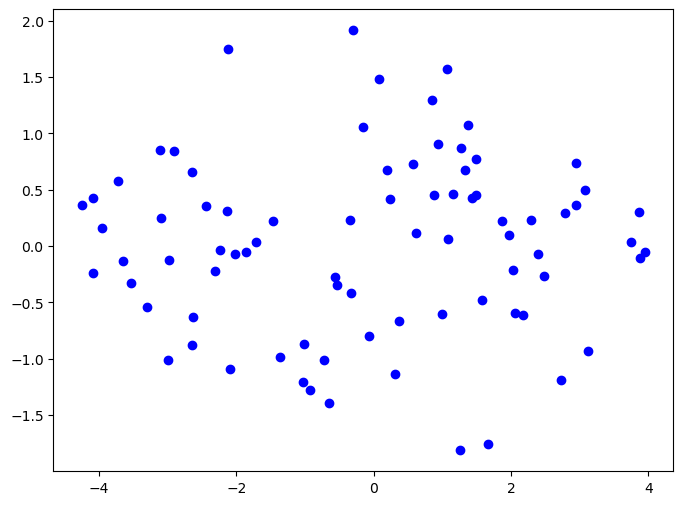

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='blue', label='Test Data')

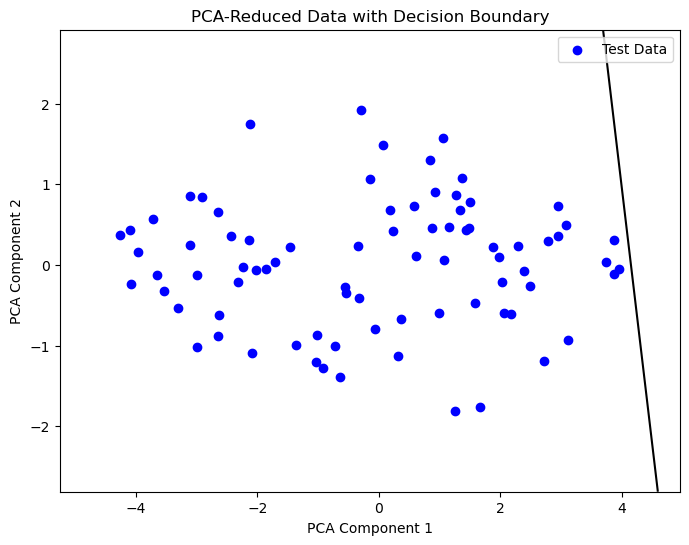

In [ ]:
# Create a meshgrid based on the PCA components
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid and make predictions
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_pca.predict(grid)

# Reshape predictions back to meshgrid shape
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='blue', label='Test Data')
plt.contour(xx, yy, Z, levels=[0.5], colors='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-Reduced Data with Decision Boundary')
plt.legend()
plt.show()


The original model, trained on all available features, demonstrated better predictive performance with a lower Training MSE (0.00387) and Test MSE (0.00462) compared to the PCA-reduced model (Training MSE 0.00448, Test MSE 0.00551). This result shows that PCA, which reduces dimensionality by maximizing variance without considering target labels, led to a slight loss of important predictive information. Therefore, the full-feature linear regression model is more effective for predicting a student's chance of admission